# Importing the libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install featurewiz

In [6]:
#importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from featurewiz import featurewiz

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



# Loading the dataset

In [ ]:
#loading the dataset

collision_data = pd.read_csv('/content/drive/MyDrive/colz/Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)

# Statistical Analysis

In [12]:
#describing the dataset
round(collision_data.describe(),2)

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1786715.00,1786715.00,2016247.00,2016234.00,2016265.00,2016265.00,2016265.00,2016265.00,2016265.00,2016265.00,2016265.00
mean,40.63,-73.75,0.30,0.00,0.06,0.00,0.03,0.00,0.22,0.00,3114944.94
std,1.98,3.73,0.69,0.04,0.24,0.03,0.16,0.01,0.65,0.03,1503962.95
min,0.00,-201.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00
25%,40.67,-73.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3140186.00
50%,40.72,-73.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3644356.00
75%,40.77,-73.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4148671.00
max,43.34,0.00,43.00,8.00,27.00,6.00,4.00,2.00,43.00,5.00,4653074.00


# Data Cleaning

In [13]:
#checking for null values in the each column of the dataset
for x in range(29):
    print("%-45s %10d" % (collision_data.columns.values[x], collision_data.iloc[:,x].isna().sum()))
print()

CRASH DATE                                             0
CRASH TIME                                             0
BOROUGH                                           627230
ZIP CODE                                          627468
LATITUDE                                          229550
LONGITUDE                                         229550
LOCATION                                          229550
ON STREET NAME                                    424219
CROSS STREET NAME                                 754476
OFF STREET NAME                                  1684418
NUMBER OF PERSONS INJURED                             18
NUMBER OF PERSONS KILLED                              31
NUMBER OF PEDESTRIANS INJURED                          0
NUMBER OF PEDESTRIANS KILLED                           0
NUMBER OF CYCLIST INJURED                              0
NUMBER OF CYCLIST KILLED                               0
NUMBER OF MOTORIST INJURED                             0
NUMBER OF MOTORIST KILLED      

In [14]:
#changing datatype of the variables

collision_data['CRASH DATE'] = collision_data['CRASH DATE'].astype('datetime64[ns]')
collision_data['CRASH TIME'] = collision_data['CRASH TIME'].astype('datetime64[ns]')
collision_data['BOROUGH'] = collision_data['BOROUGH'].astype('str')
#collision_data['ZIP CODE'] = collision_data['ZIP CODE'].astype('int')
collision_data['ON STREET NAME'] = collision_data['ON STREET NAME'].astype('str')
collision_data['CROSS STREET NAME'] = collision_data['CROSS STREET NAME'].astype('str')
collision_data['OFF STREET NAME'] = collision_data['OFF STREET NAME'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 1'] = collision_data['CONTRIBUTING FACTOR VEHICLE 1'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 2'] = collision_data['CONTRIBUTING FACTOR VEHICLE 2'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 3'] = collision_data['CONTRIBUTING FACTOR VEHICLE 3'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 4'] = collision_data['CONTRIBUTING FACTOR VEHICLE 4'].astype('str')
collision_data['CONTRIBUTING FACTOR VEHICLE 5'] = collision_data['CONTRIBUTING FACTOR VEHICLE 5'].astype('str')
collision_data['VEHICLE TYPE CODE 1'] = collision_data['VEHICLE TYPE CODE 1'].astype('str')
collision_data['VEHICLE TYPE CODE 2'] = collision_data['VEHICLE TYPE CODE 2'].astype('str')
collision_data['VEHICLE TYPE CODE 3'] = collision_data['VEHICLE TYPE CODE 3'].astype('str')
collision_data['VEHICLE TYPE CODE 4'] = collision_data['VEHICLE TYPE CODE 4'].astype('str')
collision_data['VEHICLE TYPE CODE 5'] = collision_data['VEHICLE TYPE CODE 5'].astype('str')

#filling null values with 0 and then converting the datatype
collision_data['NUMBER OF PERSONS KILLED'] = collision_data['NUMBER OF PERSONS KILLED'].fillna(0)
collision_data['NUMBER OF PERSONS INJURED'] = collision_data['NUMBER OF PERSONS INJURED'].fillna(0)

collision_data['NUMBER OF PERSONS KILLED'] = collision_data['NUMBER OF PERSONS KILLED'].astype('int')
collision_data['NUMBER OF PERSONS INJURED'] = collision_data['NUMBER OF PERSONS INJURED'].astype('int')

print("Datatype conversion completed!")

Datatype conversion completed!


In [15]:
#replacing null values/blanks of Borough column with 'No Value'
collision_data['BOROUGH'] = collision_data['BOROUGH'].replace('NaN', 'No Value')
print("Replace Successful")

Replace Successful


In [16]:
#replacing null values/blanks of Contributing Factor 1 column with 'No Value'
collision_data['CONTRIBUTING FACTOR VEHICLE 1'] = collision_data['CONTRIBUTING FACTOR VEHICLE 1'].replace('NaN', 'No Value')
print("Replace Successful")

Replace Successful


In [17]:
#replacing null values/blanks of Vehicle Type Code 1 column with 'No Value'
collision_data['VEHICLE TYPE CODE 1'] = collision_data['VEHICLE TYPE CODE 1'].replace('NaN','No Value')
print("Replace Successful")

Replace Successful


In [18]:
#dropping columns which have maximum null values and are not required for analysis
collision_data = collision_data.drop(['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 2',
'CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
'VEHICLE TYPE CODE 5'], axis=1)
print("Variables dropped!")

Variables dropped!


In [19]:
#checking for cleaned data

print("Total number of Rows and Columns:",collision_data.shape)
print("Column Values:", collision_data.columns)


Total number of Rows and Columns: (2016265, 14)
Column Values: Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1'],
      dtype='object')


In [20]:
#checking for null values in the each column of the dataset after data cleaning
for x in range(14):
    print("%-45s %10d" % (collision_data.columns.values[x], collision_data.iloc[:,x].isna().sum()))
print()

CRASH DATE                                             0
CRASH TIME                                             0
BOROUGH                                                0
NUMBER OF PERSONS INJURED                              0
NUMBER OF PERSONS KILLED                               0
NUMBER OF PEDESTRIANS INJURED                          0
NUMBER OF PEDESTRIANS KILLED                           0
NUMBER OF CYCLIST INJURED                              0
NUMBER OF CYCLIST KILLED                               0
NUMBER OF MOTORIST INJURED                             0
NUMBER OF MOTORIST KILLED                              0
CONTRIBUTING FACTOR VEHICLE 1                          0
COLLISION_ID                                           0
VEHICLE TYPE CODE 1                                    0



# Label Encoding

In [28]:
labelencoder = LabelEncoder()
collision_data['Borough Labels'] = labelencoder.fit_transform(collision_data["BOROUGH"])
collision_data['Contributing Factor Vehicle 1 Labels'] = labelencoder.fit_transform(collision_data["CONTRIBUTING FACTOR VEHICLE 1"])
collision_data['Vehicle Type Code 1 Labels'] = labelencoder.fit_transform(collision_data["VEHICLE TYPE CODE 1"])
collision_data.head(10)

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,Year,Month,Hour,Day of Week,Borough Labels,Contributing Factor Vehicle 1 Labels,Vehicle Type Code 1 Labels
0,2021-09-11,2023-08-17 02:39:00,nan,2,0,0,0,0,0,2,...,Aggressive Driving/Road Rage,4455765,Sedan,2021,9,2,5,5,3,977
1,2022-03-26,2023-08-17 11:45:00,nan,1,0,0,0,0,0,1,...,Pavement Slippery,4513547,Sedan,2022,3,11,5,5,39,977
2,2022-06-29,2023-08-17 06:55:00,nan,0,0,0,0,0,0,0,...,Following Too Closely,4541903,Sedan,2022,6,6,2,5,21,977
3,2021-09-11,2023-08-17 09:35:00,BROOKLYN,0,0,0,0,0,0,0,...,Unspecified,4456314,Sedan,2021,9,9,5,1,56,977
4,2021-12-14,2023-08-17 08:13:00,BROOKLYN,0,0,0,0,0,0,0,...,nan,4486609,nan,2021,12,8,1,1,61,1403
5,2021-04-14,2023-08-17 12:47:00,nan,0,0,0,0,0,0,0,...,Unspecified,4407458,Dump,2021,4,12,2,5,56,290
6,2021-12-14,2023-08-17 17:05:00,nan,0,0,0,0,0,0,0,...,Passing Too Closely,4486555,Sedan,2021,12,17,1,5,36,977
7,2021-12-14,2023-08-17 08:17:00,BRONX,2,0,0,0,0,0,2,...,Unspecified,4486660,Sedan,2021,12,8,1,0,56,977
8,2021-12-14,2023-08-17 21:10:00,BROOKLYN,0,0,0,0,0,0,0,...,Driver Inexperience,4487074,Sedan,2021,12,21,1,1,12,977
9,2021-12-14,2023-08-17 14:58:00,MANHATTAN,0,0,0,0,0,0,0,...,Passing Too Closely,4486519,Sedan,2021,12,14,1,2,36,977


In [29]:
#creating a new dataframe

new_collision_data = pd.DataFrame()


new_collision_data['Borough Labels'] = collision_data['Borough Labels']
new_collision_data['NUMBER OF PERSONS KILLED'] = collision_data['NUMBER OF PERSONS KILLED']
new_collision_data['NUMBER OF PERSONS INJURED'] = collision_data['NUMBER OF PERSONS INJURED']
new_collision_data['NUMBER OF PEDESTRIANS INJURED'] = collision_data['NUMBER OF PEDESTRIANS INJURED']
new_collision_data['NUMBER OF PEDESTRIANS KILLED'] = collision_data['NUMBER OF PEDESTRIANS KILLED']
new_collision_data['NUMBER OF CYCLIST INJURED'] = collision_data['NUMBER OF CYCLIST INJURED']
new_collision_data['NUMBER OF CYCLIST KILLED'] = collision_data['NUMBER OF CYCLIST KILLED']
new_collision_data['NUMBER OF MOTORIST INJURED'] = collision_data['NUMBER OF MOTORIST INJURED']
new_collision_data['NUMBER OF MOTORIST KILLED'] = collision_data['NUMBER OF MOTORIST KILLED']
new_collision_data['Contributing Factor Vehicle 1 Labels'] = collision_data['Contributing Factor Vehicle 1 Labels']
new_collision_data['Vehicle Type Code 1 Labels'] = collision_data['Vehicle Type Code 1 Labels']
new_collision_data['COLLISION_ID'] = collision_data['COLLISION_ID']

print("Dataframe created.")


Dataframe created.


# Correlation Plot

Text(0.5, 1.0, 'Correlation Plot')

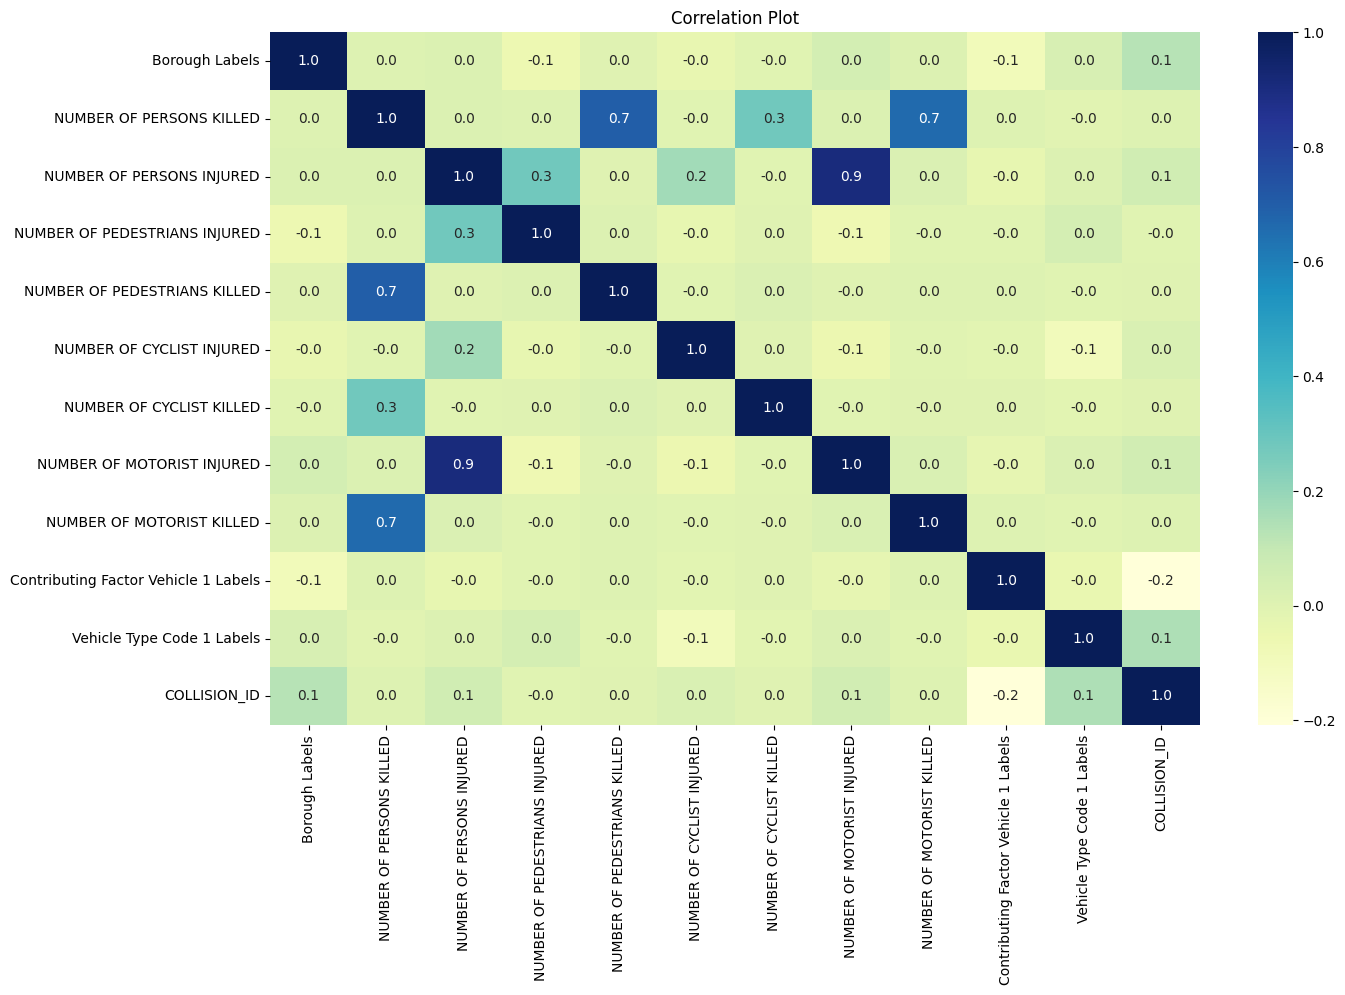

In [30]:
# correlation plot

plt.figure(figsize = (15,9))
ax = plt.subplot()
sns.heatmap(new_collision_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot')

# Feature Selection & Extraction

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (2016265, 12)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample

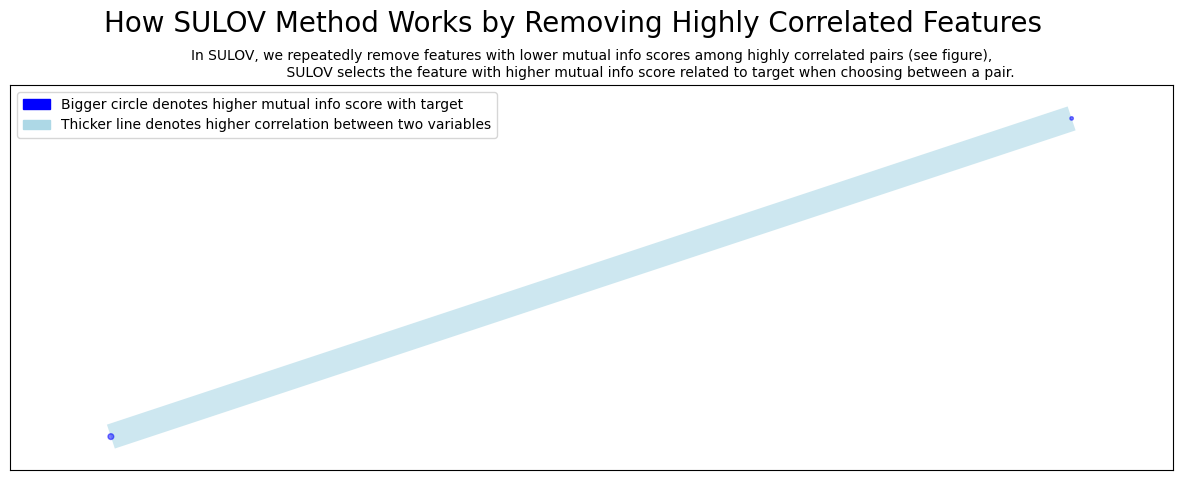

Time taken for SULOV method = 66 seconds
    Adding 0 categorical variables to reduced numeric variables  of 9
Final list of selected 9 vars after SULOV = ['BoroughLabels', 'NUMBEROFPEDESTRIANSINJURED', 'NUMBEROFPEDESTRIANSKILLED', 'NUMBEROFCYCLISTINJURED', 'NUMBEROFCYCLISTKILLED', 'NUMBEROFMOTORISTKILLED', 'ContributingFactorVehicle1Labels', 'VehicleTypeCode1Labels', 'NUMBEROFPERSONSINJURED']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 2 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 20
Regular XGBoost is crashing due to: [13:30:11] ../src/objective/multiclass_obj.cu:123: SoftmaxMultiClassObj: label 

In [31]:
#automatic feature extraction
target = 'NUMBER OF PERSONS KILLED'
features, train = featurewiz(new_collision_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [32]:
print(features)

['Borough Labels', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED', 'Contributing Factor Vehicle 1 Labels', 'Vehicle Type Code 1 Labels', 'NUMBER OF PERSONS INJURED']


# Model Building

In [33]:
#creating a new dataframe for model building based on the features selected

new_model_collision_data = pd.DataFrame()

new_model_collision_data['Borough Labels'] = collision_data['Borough Labels']
new_model_collision_data['NUMBER OF PERSONS INJURED'] = collision_data['NUMBER OF PERSONS INJURED']
new_model_collision_data['NUMBER OF PEDESTRIANS INJURED'] = collision_data['NUMBER OF PEDESTRIANS INJURED']
new_model_collision_data['NUMBER OF PEDESTRIANS KILLED'] = collision_data['NUMBER OF PEDESTRIANS KILLED']
new_model_collision_data['NUMBER OF CYCLIST INJURED'] = collision_data['NUMBER OF CYCLIST INJURED']
new_model_collision_data['NUMBER OF CYCLIST KILLED'] = collision_data['NUMBER OF CYCLIST KILLED']
#new_model_collision_data['NUMBER OF MOTORIST INJURED'] = collision_data['NUMBER OF MOTORIST INJURED']       #removed since the variable is highly correlated with number of persons injured
new_model_collision_data['NUMBER OF MOTORIST KILLED'] = collision_data['NUMBER OF MOTORIST KILLED']
new_model_collision_data['Contributing Factor Vehicle 1 Labels'] = collision_data['Contributing Factor Vehicle 1 Labels']
new_model_collision_data['Vehicle Type Code 1 Labels'] = collision_data['Vehicle Type Code 1 Labels']
new_model_collision_data['COLLISION_ID'] = collision_data['COLLISION_ID']

print("Dataframe created.")


Dataframe created.


In [35]:
#extracting features and labels from the dataset

x = new_model_collision_data
y = collision_data['NUMBER OF PERSONS KILLED']

In [36]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1613012, 10)
(403253, 10)


# Linear Regression Model

In [37]:
#linear regression model

linear_regressionmodel = LinearRegression()
linear_regressionmodel.fit(X_train, y_train)

LinearRegression()

In [38]:
#predict the result for the model

predicted_value_LR = linear_regressionmodel.predict(X_test)

In [39]:
#accuracy of the LR for training and testing set

print('Accuracy of Linear Regressor model on training set: {:.2f}'.format(linear_regressionmodel.score(X_train, y_train)))
print('Accuracy of Linear Regressor model on test set:     {:.2f}'.format(linear_regressionmodel.score(X_test, y_test)))

result_LR = linear_regressionmodel.score(X_test, y_test)
result_LR = round(result_LR,4)
result_LR

Accuracy of Linear Regressor model on training set: 0.98
Accuracy of Linear Regressor model on test set:     0.99


0.9857

In [40]:
#evaluating the model
print("Model Evaluation of Linear Regression.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_LR),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_LR),1))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_LR)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_LR))

Model Evaluation of Linear Regression.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.9856516065531274


# Decision Tree Regressor Model

In [41]:
#decision tree regressor

decisiontree_model = DecisionTreeRegressor(max_depth=5)
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [42]:
#predict the result for the model

predicted_value_dt = decisiontree_model.predict(X_test)

In [43]:
#accuracy of the DT for training and testing set

print('Accuracy of Decision Tree Regressor model on training set: {:.2f}'.format(decisiontree_model.score(X_train, y_train)))
print('Accuracy of Decision Tree Regressor model on test set:     {:.2f}'.format(decisiontree_model.score(X_test, y_test)))

result_DT = decisiontree_model.score(X_test, y_test)
result_DT = round(result_DT,3)
result_DT

Accuracy of Decision Tree Regressor model on training set: 0.98
Accuracy of Decision Tree Regressor model on test set:     0.98


0.979

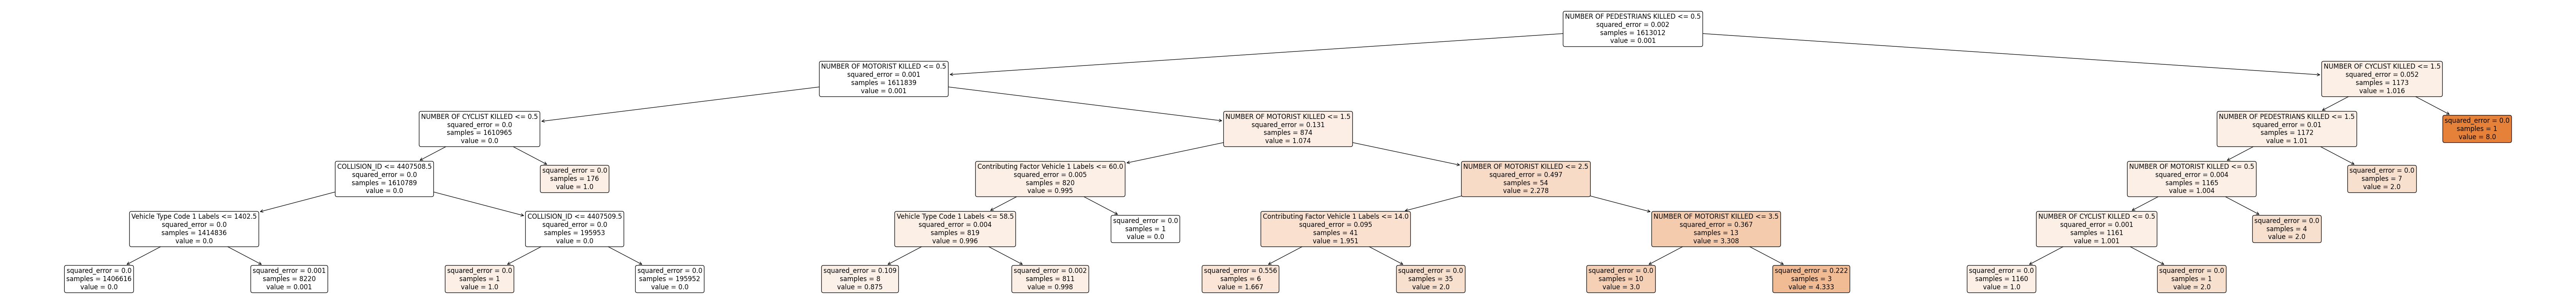

In [44]:
#plotting the decision tree

feature_names = x.columns

plt.figure(figsize=(85,10))
a = tree.plot_tree(decisiontree_model,
                   feature_names = feature_names,
                   class_names = collision_data['NUMBER OF PERSONS KILLED'],
                   rounded = True,
                   filled = True,
                   fontsize=12)
plt.show()

<Axes: >

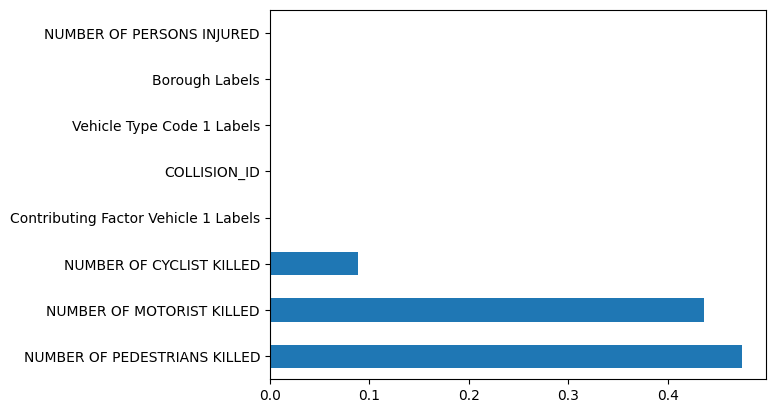

In [45]:
#feature importance for decision tree regressor

(pd.Series(decisiontree_model.feature_importances_, index=x.columns)
   .nlargest(8)
   .plot(kind='barh'))

In [46]:
#evaluating the model
print("Model Evaluation of Decision Tree Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_dt),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_dt),1))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_dt)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_dt))

Model Evaluation of Decision Tree Regressor.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.9788999772870695


# Random Forest Regressor Model

In [47]:
#random forest regressor

randomforest_model = RandomForestRegressor(n_estimators = 500, max_depth=3)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [48]:
#predict the result for the model

predicted_value_rf = randomforest_model.predict(X_test)

In [49]:
#accuracy of the RF for training and testing set

print('Accuracy of Random Forest Regressor model on training set: {:.2f}'.format(randomforest_model.score(X_train, y_train)))
print('Accuracy of Random Forest Regressor model on test set:     {:.2f}'.format(randomforest_model.score(X_test, y_test)))

result_RF = randomforest_model.score(X_test, y_test)
result_RF = round(result_RF,3)
result_RF

Accuracy of Random Forest Regressor model on training set: 0.97
Accuracy of Random Forest Regressor model on test set:     0.98


0.978

<Axes: >

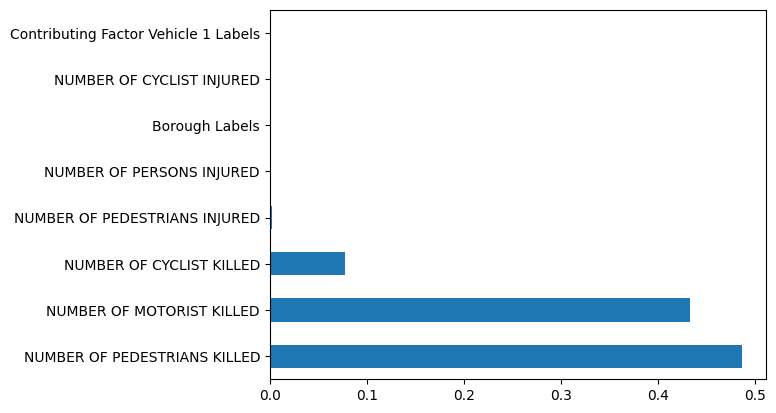

In [50]:
#feature importance for random forest regressor

(pd.Series(randomforest_model.feature_importances_, index=x.columns)
   .nlargest(8)
   .plot(kind='barh'))

In [51]:
#evaluating the model
print("Model Evaluation of Random Forest Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_rf),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_rf),1))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_rf)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_rf))

Model Evaluation of Random Forest Regressor.
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-Squared value: 0.9775332943458387
